In [3]:
%matplotlib inline

import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize

import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da

# Series

In [4]:
random_numbers = np.random.randn(5)
random_numbers

array([-0.6212605 , -1.45334304, -0.1547025 , -0.44203959, -0.58652336])

In [5]:
# series
s = pd.Series(random_numbers, index=['a', 'b', 'c', 'd', 'hey'])
s

a     -0.621261
b     -1.453343
c     -0.154703
d     -0.442040
hey   -0.586523
dtype: float64

In [6]:
s[0]

-0.62126050099841912

In [7]:
s[:3]

a   -0.621261
b   -1.453343
c   -0.154703
dtype: float64

In [8]:
s.median()

-0.5865233617886585

In [9]:
s[s > s.median()]

c   -0.154703
d   -0.442040
dtype: float64

In [10]:
s[[4, 3, 1]]

hey   -0.586523
d     -0.442040
b     -1.453343
dtype: float64

In [11]:
np.exp(s)

a      0.537267
b      0.233787
c      0.856670
d      0.642724
hey    0.556258
dtype: float64

In [12]:
s['a']

-0.62126050099841912

In [13]:
s['a'] = 1
s

a      1.000000
b     -1.453343
c     -0.154703
d     -0.442040
hey   -0.586523
dtype: float64

In [14]:
'a' in s

True

In [15]:
'foo' in s

False

In [16]:
s['foo']

KeyError: 'foo'

In [18]:
s.get('foo')

In [20]:
s.get('foo', np.nan)

nan

In [21]:
s.get('foo', 'bar')

'bar'

In [22]:
s + s

a      2.000000
b     -2.906686
c     -0.309405
d     -0.884079
hey   -1.173047
dtype: float64

In [23]:
s[1:] + s[:-1]

a           NaN
b     -2.906686
c     -0.309405
d     -0.884079
hey         NaN
dtype: float64

In [24]:
s[:-2]

a    1.000000
b   -1.453343
c   -0.154703
dtype: float64

In [25]:
s = pd.Series(random_numbers, name='something')
s

0    1.000000
1   -1.453343
2   -0.154703
3   -0.442040
4   -0.586523
Name: something, dtype: float64

In [26]:
s.name

'something'

In [27]:
s2 = s.rename('different')
s2.name

'different'

In [28]:
s2 == s

0    True
1    True
2    True
3    True
4    True
dtype: bool

# DataFrame

In [29]:
d = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.,], index=['a', 'b', 'c', 'd'])
}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [30]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [31]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three', 'four'])

,two,three,four
d,4.0,NaN,NaN
b,2.0,NaN,NaN
a,1.0,NaN,NaN


In [32]:
df.index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [33]:
df.columns

Index([u'one', u'two'], dtype='object')

In [34]:
d = {
    'one': [1., 2., 3., 4.],
    'two': [4., 3., 2., 1.],
}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [35]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [36]:
data = np.zeros((2,), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data

array([(0,  0., ''), (0,  0., '')], 
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [37]:
data[:] = [(1, 2., 'Hello'), (2, 3., 'World')]
data

array([(1,  2., 'Hello'), (2,  3., 'World')], 
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [38]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,Hello
1,2,3.0,World


In [39]:
data2 = [
    {'a': 1, 'b': 2},
    {'a': 5, 'b': 10, 'c': 20},
]

pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [40]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
              ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
              ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
              ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
              ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

can't undesrtand

In [41]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [42]:
df['three'] = df['one'] * df['two']
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [43]:
df['flag'] = df['one'] < 2
df

,one,two,three,flag
a,1.0,1.0,1.0,True
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,False
d,NaN,4.0,NaN,False


In [44]:
del df['two']
df

,one,three,flag
a,1.0,1.0,True
b,2.0,4.0,False
c,3.0,9.0,False
d,NaN,NaN,False


In [45]:
df['foo'] = 'bar'
df

,one,three,flag,foo
a,1.0,1.0,True,bar
b,2.0,4.0,False,bar
c,3.0,9.0,False,bar
d,NaN,NaN,False,bar


In [46]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-0.740285,-0.229037,0.278829,-1.079745
1,-1.030723,0.219948,0.107782,-0.152417
2,0.855404,0.024854,1.083006,0.538814
3,-0.653187,1.078227,0.702769,-0.616889
4,-0.384135,-0.746799,1.366184,1.583950
5,0.325511,-1.237198,0.913185,0.900878
6,-0.963414,-0.999049,2.320056,1.199078
7,-0.192490,0.675802,1.732766,-1.069091
8,-1.821022,-0.294769,0.946247,3.433658
9,0.391342,-0.694400,-0.213835,1.329065


In [47]:
df.iloc[0]

A   -0.740285
B   -0.229037
C    0.278829
D   -1.079745
Name: 0, dtype: float64

In [48]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.290438,0.448986,-0.171047,0.927328
2,1.595689,0.253891,0.804177,1.618559
3,0.087099,1.307265,0.423940,0.462856
4,0.356150,-0.517762,1.087355,2.663695
5,1.065797,-1.008161,0.634356,1.980623
6,-0.223129,-0.770012,2.041227,2.278824
7,0.547795,0.904839,1.453937,0.010655
8,-1.080737,-0.065732,0.667417,4.513403
9,1.131627,-0.465363,-0.492664,2.408810


In [49]:
df = pd.DataFrame({'foo1': np.random.randn(5),
                   'foo2': np.random.randn(5)})
df

,foo1,foo2
0,0.052050,-0.492902
1,-1.282070,2.358474
2,1.015551,0.123385
3,-1.016634,1.114979
4,0.125275,1.980274


In [50]:
df.foo2

0   -0.492902
1    2.358474
2    0.123385
3    1.114979
4    1.980274
Name: foo2, dtype: float64

In [51]:
tuples = [
    ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],
]
tuples

[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
 ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

In [52]:
zip(tuples)

[(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],),
 (['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'],)]

In [53]:
zip(*tuples)

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [54]:
zip(tuples[0])

[('bar',),
 ('bar',),
 ('baz',),
 ('baz',),
 ('foo',),
 ('foo',),
 ('qux',),
 ('qux',)]

In [55]:
zip(*tuples[0])

[('b', 'b', 'b', 'b', 'f', 'f', 'q', 'q'),
 ('a', 'a', 'a', 'a', 'o', 'o', 'u', 'u'),
 ('r', 'r', 'z', 'z', 'o', 'o', 'x', 'x')]

In [56]:
tuples = list(zip(*tuples))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[[u'bar', u'baz', u'foo', u'qux'], [u'one', u'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'first', u'second'])

In [57]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.832996 -0.278829
      two     0.014669 -1.587622
baz   one     1.120276  0.422882
      two    -0.309840 -0.687534

In [58]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.832996
               B   -0.278829
       two     A    0.014669
               B   -1.587622
baz    one     A    1.120276
               B    0.422882
       two     A   -0.309840
               B   -0.687534
dtype: float64

In [59]:
symbols = ["AAPL", "GLD", "GOOG", "$SPX", "XOM"]

start_date = dt.datetime(2006, 1, 1)
end_date = dt.datetime(2010, 12, 31)
timeofday = dt.timedelta(hours=16)
timestamps = du.getNYSEdays(start_date, end_date, timeofday)

dataobject = da.DataAccess('Yahoo')
keys = ['close']

data = dataobject.get_data(timestamps, symbols, keys)
d_data = dict(zip(keys, data))
close_price = d_data['close'].values

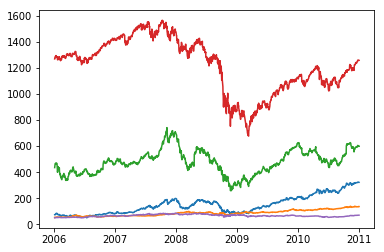

In [60]:
plt.clf()
plt.plot(timestamps, close_price)

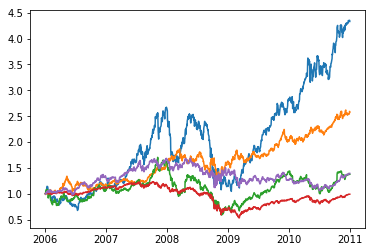

In [61]:
close_price_normalized = close_price / close_price[0, :]
plt.clf()
plt.plot(timestamps, close_price_normalized)

In [62]:
returns = close_price_normalized.copy()
tsu.returnize0(returns)[:10]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.95579739e-03,   3.38855422e-03,   2.29993337e-02,
          3.67276166e-03,   1.78323757e-03],
       [ -7.90354990e-03,  -1.80112570e-02,   1.34758782e-02,
          1.57052440e-05,  -4.94462025e-03],
       [  2.57899001e-02,   2.63660680e-02,   3.19563868e-02,
          9.39944090e-03,   1.96779964e-02],
       [ -3.29077267e-03,   1.63812360e-02,   2.66288708e-03,
          3.65630713e-03,  -3.89863548e-04],
       [  6.32593767e-02,  -9.89010989e-03,   6.12550867e-03,
         -3.56547688e-04,   7.60530421e-03],
       [  3.76350764e-02,   8.69404366e-03,   3.98075613e-03,
          3.48145678e-03,   6.96729243e-03],
       [  4.66842231e-03,  -1.83385292e-03,  -1.69624494e-02,
         -6.27424315e-03,  -1.05708245e-02],
       [  1.53699511e-02,   1.85559434e-02,   5.65105796e-03,
          1.20523148e-03,   2.23387723e-02],
       [ -1.02088712e-02,  -3.2467532

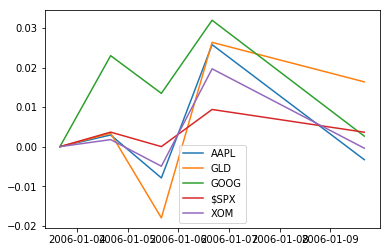

In [63]:
plt.clf()
plt.plot(timestamps[0:5], returns[0:5])
plt.legend(symbols)

In [64]:
myarray = np.arange(9).reshape(3, 3)
myarray

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [65]:
myarray.std(0)

array([ 2.44948974,  2.44948974,  2.44948974])

In [66]:
std_deviation = returns.std(0)
np.mean(std_deviation * np.array([0, .1, .1, .1, .7]))

0.0037276903205594085

In [67]:
returns

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  2.95579739e-03,   3.38855422e-03,   2.29993337e-02,
          3.67276166e-03,   1.78323757e-03],
       [ -7.90354990e-03,  -1.80112570e-02,   1.34758782e-02,
          1.57052440e-05,  -4.94462025e-03],
       ..., 
       [  2.44362647e-03,   1.62938824e-02,  -5.74388260e-03,
          7.71347233e-04,   5.57222460e-03],
       [ -5.55418415e-04,   3.57090803e-03,   3.47291792e-03,
          1.00912984e-03,  -5.68343279e-04],
       [ -5.00154369e-03,  -4.93791301e-03,  -3.56073211e-03,
         -1.50819984e-03,  -1.42166619e-04]])